In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv('uber.csv')

In [80]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [81]:
df=df.drop(['key','Unnamed: 0'],axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [83]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [84]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [85]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [86]:
df.dropna(inplace=True)

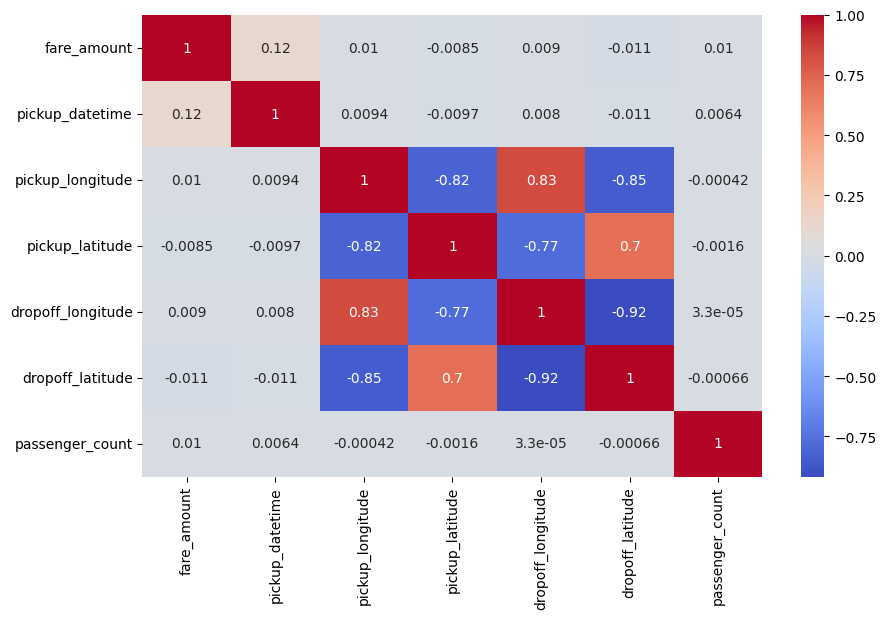

In [87]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

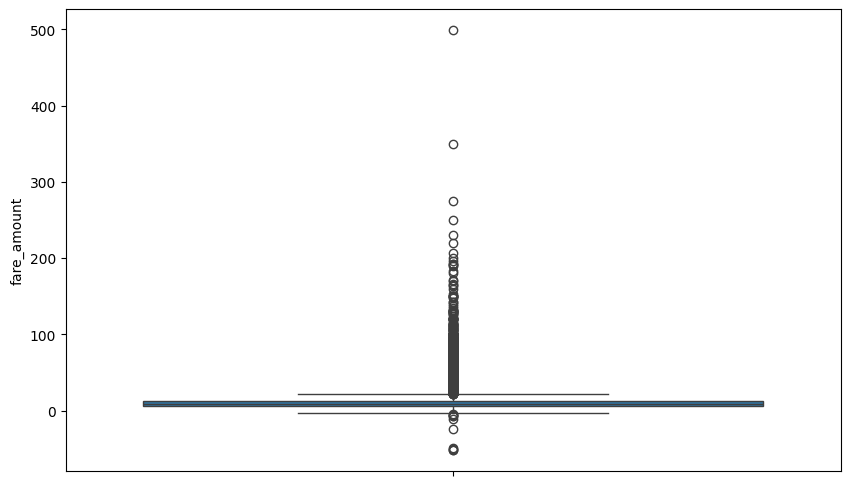

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(df['fare_amount'])
plt.show()

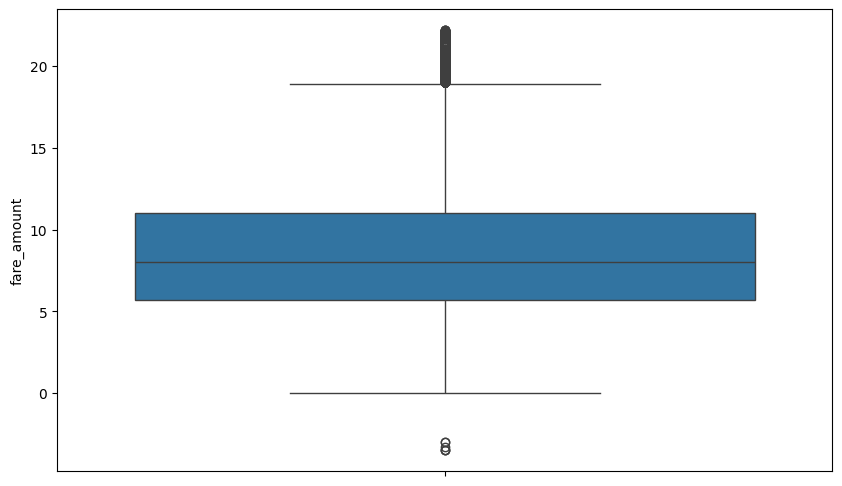

In [89]:
Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)

IQR=Q3-Q1

lower=Q1-(1.5*IQR)
higher=Q3+(1.5*IQR)

df=df[(df['fare_amount'] > lower) & (df['fare_amount'] < higher)]

plt.figure(figsize=(10,6))
sns.boxplot(df['fare_amount'])
plt.show()

In [90]:
df.loc[:,'Distance']=np.sqrt((df['dropoff_longitude']-df['pickup_longitude'])**2 + (df['dropoff_latitude']-df['pickup_latitude'])**2)

In [91]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,0.051031
...,...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,0.012060
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.001064
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,0.022126
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,0.033101


In [92]:

x=df.drop('fare_amount',axis=1)
y=df['fare_amount']

x['pickup_datetime']=pd.to_numeric(x['pickup_datetime'])

x

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5,0.051031
...,...,...,...,...,...,...,...
199994,1391179320000000000,-73.983070,40.760770,-73.972972,40.754177,1,0.012060
199995,1351421340000000000,-73.987042,40.739367,-73.986525,40.740297,1,0.001064
199996,1394759340000000000,-73.984722,40.736837,-74.006672,40.739620,1,0.022126
199998,1432133785000000000,-73.997124,40.725452,-73.983215,40.695415,1,0.033101


In [93]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [94]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()

linear.fit(x_train,y_train)

y_pred=linear.predict(x_test)

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_absolute_error(y_test,y_pred))
r2score=r2_score(y_test,y_pred)

print("mae : ",mae)
print("rmse : ",rmse)
print("r2score : ",r2score)

mae :  3.25069514555633
rmse :  1.8029684261118746
r2score :  0.02048092522349343


In [96]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100,random_state=101)

model.fit(x_train,y_train)

y_pred2=model.predict(x_test)

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred2)
rmse=np.sqrt(mean_absolute_error(y_test,y_pred2))
r2score=r2_score(y_test,y_pred2)

print("mae : ",mae)
print("rmse : ",rmse)
print("r2score : ",r2score)

mae :  1.4408766282351397
rmse :  1.2003652061914907
r2score :  0.7405249541666158
